In [66]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

import utils.merge_tools as M

In [27]:
base_file_path = '../data/raw/parquet_files/train/train_base.parquet'
pl_df = pl.read_parquet(base_file_path).pipe(M.set_table_dtypes)
df = pl_df.to_pandas()

In [28]:
target_vals = df['target'].value_counts().reset_index()

target_vals['count'] = target_vals['count'] / 1000

[]

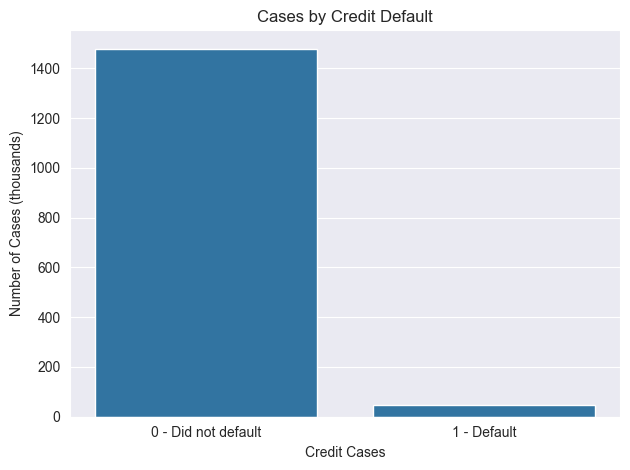

In [29]:
sns.set_style('darkgrid')

sns.barplot(target_vals, x='target', y='count')

plt.xlabel('Credit Cases')
plt.ylabel('Number of Cases (thousands)')

plt.xticks(ticks=[0, 1], labels=['0 - Did not default', '1 - Default'])

plt.title('Cases by Credit Default')

plt.tight_layout()
plt.plot()

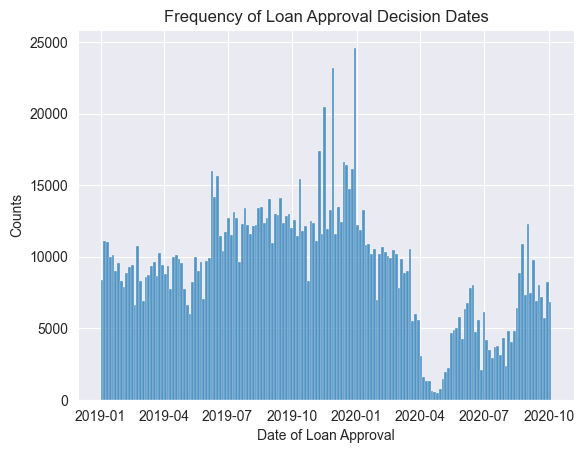

In [34]:
sns.histplot(data=df, x='date_decision')

plt.title('Frequency of Loan Approval Decision Dates')
plt.xlabel('Date of Loan Approval')
plt.ylabel('Counts')

plt.show()

In [60]:
df_dd = df[['target', 'date_decision']]

In [62]:
months = (df_dd['date_decision'].max() - df_dd['date_decision'].min()).days // 30
df_dd['date_bin'] = pd.cut(df_dd['date_decision'], bins=months)

/var/folders/sp/dv4f3qgx20vb8f6ghm2mh5880000gn/T/ipykernel_36328/2913596088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dd['date_bin'] = pd.cut(df_dd['date_decision'], bins=months)


In [64]:
total_dates = df_dd.groupby('date_bin')['target'].count().reset_index()
pos_dates = df_dd.groupby('date_bin')['target'].sum().reset_index()

/var/folders/sp/dv4f3qgx20vb8f6ghm2mh5880000gn/T/ipykernel_36328/3789255931.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_dates = df_dd.groupby('date_bin')['target'].count().reset_index()
/var/folders/sp/dv4f3qgx20vb8f6ghm2mh5880000gn/T/ipykernel_36328/3789255931.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pos_dates = df_dd.groupby('date_bin')['target'].sum().reset_index()


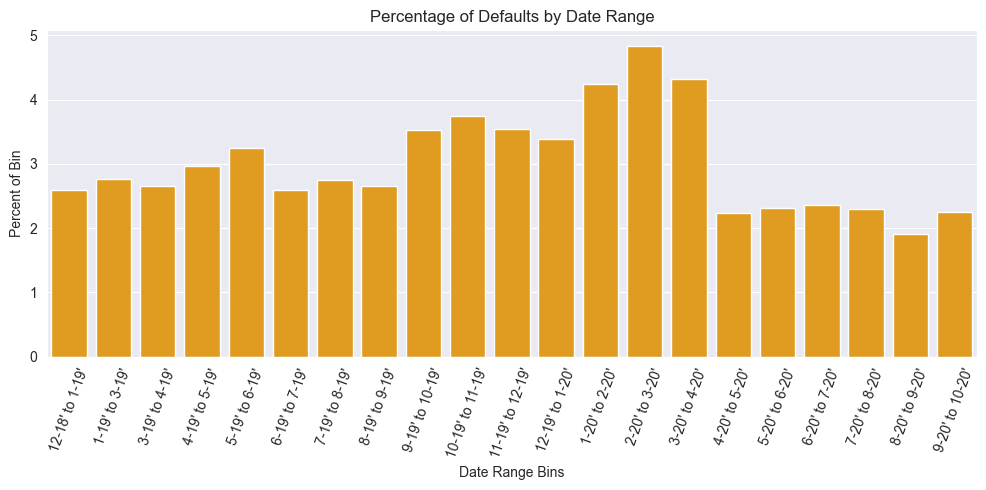

In [88]:
pos_dates['pct'] = [ i / j * 100 for i,j in zip(pos_dates['target'], total_dates['target']) ]
total_dates['pct'] = [ i / j * 100 for i,j in zip(total_dates['target'], total_dates['target']) ]

plt.figure(figsize=(10, 5))

# bar_1 = sns.barplot(data=total_dates, x='date_bin', y='pct')
bar_2 = sns.barplot(data=pos_dates, x='date_bin', y='pct', color='orange')


bins_list = total_dates['date_bin'].unique().tolist()
x_tick_labels = [ 
    f"{cat.left.month}-{cat.left.year % 100}' to {cat.right.month}-{cat.right.year % 100}'"
    for cat in bins_list 
]

plt.xticks(ticks=range(len(bins_list)), labels=x_tick_labels, rotation=70)
plt.xlabel('Date Range Bins')
plt.ylabel('Percent of Bin')
plt.title('Percentage of Defaults by Date Range')

# top_bar = mpatches.Patch(label='Default = No')
# bottom_bar = mpatches.Patch(color='orange', label='Default = Yes')
# plt.legend(handles=[top_bar, bottom_bar])

plt.tight_layout()
plt.show()

In [89]:
df

,case_id,date_decision,MONTH,WEEK_NUM,target
0,0,2019-01-03,201901,0,0
1,1,2019-01-03,201901,0,0
2,2,2019-01-04,201901,0,0
3,3,2019-01-03,201901,0,0
4,4,2019-01-04,201901,0,1
...,...,...,...,...,...
1526654,2703450,2020-10-05,202010,91,0
1526655,2703451,2020-10-05,202010,91,0
1526656,2703452,2020-10-05,202010,91,0
1526657,2703453,2020-10-05,202010,91,0


In [113]:
train_person_1 = pd.read_parquet('../data/raw/parquet_files/train/train_person_1.parquet')
income_type = train_person_1.groupby('case_id')['incometype_1044T'].first().reset_index()
tp1_df = pd.merge(df, income_type, on='case_id', how='left')

In [115]:
total_inc = tp1_df.groupby('incometype_1044T')['target'].count().reset_index()
pos_inc = tp1_df.groupby('incometype_1044T')['target'].sum().reset_index()

pos_inc['pct'] = [ i / j * 100 for i,j in zip(pos_inc['target'], total_inc['target']) ]
# total_inc['pct'] = [ i / j * 100 for i,j in zip(total_inc['target'], total_inc['target']) ]

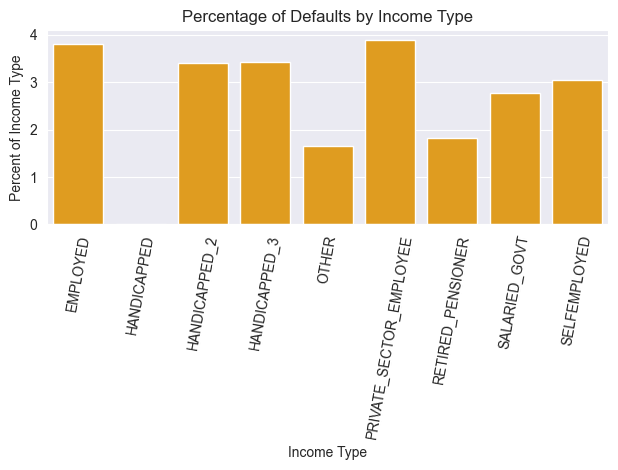

In [123]:
# plt.figure(figsize=(10, 5))

# bar_1 = sns.barplot(data=total_inc, x='date_bin', y='pct')
bar_2 = sns.barplot(data=pos_inc, x='incometype_1044T', y='pct', color='orange')

plt.xticks(rotation=80)
plt.xlabel('Income Type')
plt.ylabel('Percent of Income Type')
plt.title('Percentage of Defaults by Income Type')

# top_bar = mpatches.Patch(label='Default = No')
# bottom_bar = mpatches.Patch(color='orange', label='Default = Yes')
# plt.legend(handles=[top_bar, bottom_bar])

plt.tight_layout()
plt.show()

In [124]:
df

,case_id,date_decision,MONTH,WEEK_NUM,target
0,0,2019-01-03,201901,0,0
1,1,2019-01-03,201901,0,0
2,2,2019-01-04,201901,0,0
3,3,2019-01-03,201901,0,0
4,4,2019-01-04,201901,0,1
...,...,...,...,...,...
1526654,2703450,2020-10-05,202010,91,0
1526655,2703451,2020-10-05,202010,91,0
1526656,2703452,2020-10-05,202010,91,0
1526657,2703453,2020-10-05,202010,91,0
